In [1]:
!pip install soundata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.0/162.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 27.2 MB/s eta 0:00:00
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64901 sha256=2d755359ff22ba78977aced3c130f6e3d9fdc722c5d21af

In [2]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()
dataset.validate()

5.61GB [06:40, 15.0MB/s]                            
1.15MB [00:02, 589kB/s]                             
100%|██████████| 8732/8732 [00:50<00:00, 174.48it/s]


({'metadata': {}, 'clips': {}}, {'metadata': {}, 'clips': {}})

In [3]:
clips = dataset.load_clips()
clips

{'135776-2-0-49': Clip(
   audio_path="/root/sound_datasets/urbansound8k/audio/fold1/135776-2-0-49.wav",
   clip_id="135776-2-0-49",
   audio: The clip's audio
             * np.ndarray - audio signal
             * float - sample rate,
   class_id: The clip's class id.
             * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
   class_label: The clip's class label.
             * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
   fold: The clip's fold.
             * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
   freesound_end_time: The clip's end time in Freesound.
             * float - end time in seconds of the clip in the original freesound recording,
   freesound_id: The clip's Freesound ID.
             * str - ID of the freesound.org recording from which this clip w

In [4]:
clip_ids = dataset.clip_ids
print(clip_ids[:5])

['135776-2-0-49', '46654-6-0-0', '57320-0-0-24', '134717-0-0-26', '174276-7-5-0']


In [5]:

for clip_id in dataset.clip_ids:
    clip = dataset.clip(clip_id)

    waveform, sr = clip.audio
    print(f"Clip ID: {clip.clip_id}")
    print(f"Audio shape: {waveform.shape}")
    print(f"Sample rate: {sr}")
    print(f"Clip metadata: {clip}")
    break


Clip ID: 135776-2-0-49
Audio shape: (176400,)
Sample rate: 44100
Clip metadata: Clip(
  audio_path="/root/sound_datasets/urbansound8k/audio/fold1/135776-2-0-49.wav",
  clip_id="135776-2-0-49",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the

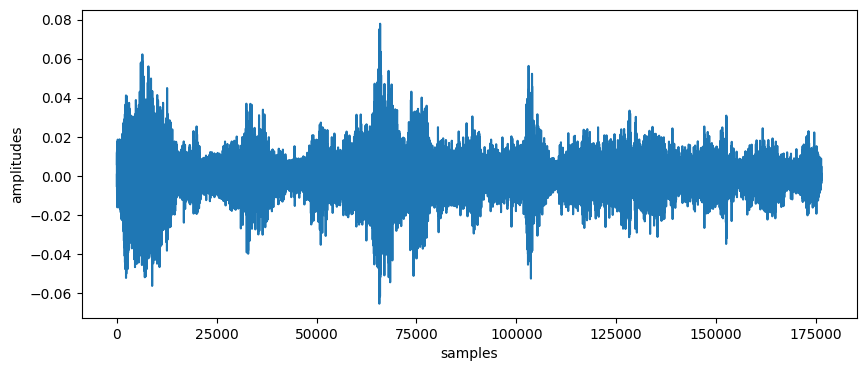

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(waveform)
plt.xlabel("samples")
plt.ylabel("amplitudes")
plt.show()

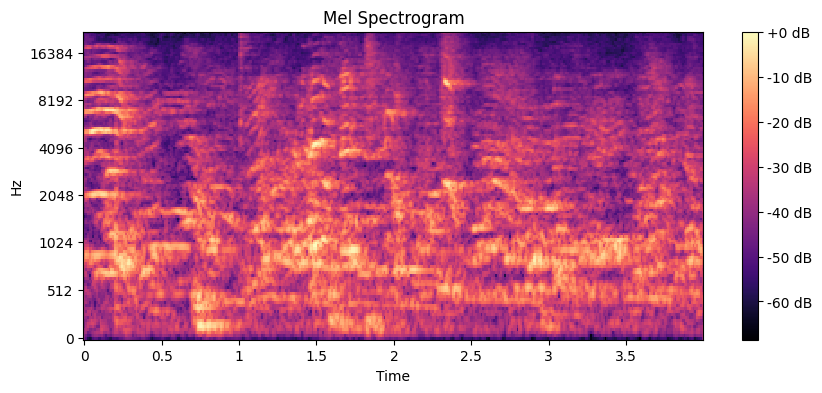

In [7]:
import librosa
import librosa.display
import numpy as np

mel_spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sr, n_mels=128, fmax=8000)

mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()

In [8]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundata

dataset = soundata.initialize('urbansound8k')

In [9]:
output_folder = "/content/mel_spectrograms"
os.makedirs(output_folder, exist_ok=True)

In [10]:
!pip install soundata
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()
dataset.validate()


100%|██████████| 8732/8732 [00:48<00:00, 179.28it/s]


({'metadata': {}, 'clips': {}}, {'metadata': {}, 'clips': {}})

In [11]:
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz

--2025-02-04 21:02:03--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1203745/files/UrbanSound8K.tar.gz [following]
--2025-02-04 21:02:04--  https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  12.6MB/s    in 7m 43s  

2025-02-04 21:09:47 (12.4 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



In [12]:
import tarfile

dataset_tar = "/content/UrbanSound8K.tar.gz"
extract_path = "/content/"

with tarfile.open(dataset_tar, 'r:gz') as tar_ref:
    tar_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [13]:
import os
print("Dataset path exists:", os.path.exists("/content/UrbanSound8K/audio"))


Dataset path exists: True


In [15]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

dataset_path = "/content/UrbanSound8K/audio"
output_path = "/content/mel_spectrograms"

os.makedirs(output_path, exist_ok=True)

def save_mel_spectrogram(audio_path, fold, clip_id):
    """Generate and save a mel spectrogram from an audio file while managing memory."""
    try:
        y, sr = librosa.load(audio_path, sr=22050)

        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        fold_path = os.path.join(output_path, f"fold{fold}")
        os.makedirs(fold_path, exist_ok=True)

        plt.figure(figsize=(4, 4), dpi=100)
        librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.axis('off')
        plt.savefig(os.path.join(fold_path, f"{clip_id}.png"), bbox_inches='tight', pad_inches=0)
        plt.close()

        del y, mel_spectrogram, mel_spectrogram_db
        gc.collect()

    except Exception as e:
        print(f"⚠️ Error processing {audio_path}: {e}")

max_files = 1000
file_counter = 0
batch_size = 200
for fold in sorted(os.listdir(dataset_path)):
    # Skip .DS_Store files
    if fold == ".DS_Store":
        continue
    fold_path = os.path.join(dataset_path, fold)

    for audio_file in sorted(os.listdir(fold_path)):
        if audio_file.endswith(".wav"):
            audio_path = os.path.join(fold_path, audio_file)
            clip_id = os.path.splitext(audio_file)[0]

            save_mel_spectrogram(audio_path, fold, clip_id)

            file_counter += 1

            if file_counter % batch_size == 0:
                print(f"🛠️ Processed {file_counter} files... clearing memory")
                gc.collect()

            if file_counter >= max_files:
                print("✅ Processed 1000 files. Stopping execution.")
                break

    if file_counter >= max_files:
        break

print("✅ Mel spectrograms saved successfully!")

🛠️ Processed 200 files... clearing memory
🛠️ Processed 400 files... clearing memory
🛠️ Processed 600 files... clearing memory
🛠️ Processed 800 files... clearing memory


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


🛠️ Processed 1000 files... clearing memory
✅ Processed 1000 files. Stopping execution.
✅ Mel spectrograms saved successfully!


In [22]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2
import os

spectrogram_dir = "/content/mel_spectrograms"
X = []
y = []

for fold in sorted(os.listdir(spectrogram_dir)):
    fold_path = os.path.join(spectrogram_dir, fold)

    for file in sorted(os.listdir(fold_path)):
        img_path = os.path.join(fold_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))

        X.append(img)
        y.append(fold)

X = np.array(X) / 255.0
y = np.array(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset Shape:", X.shape, y.shape)

Dataset Shape: (1000, 128, 128) (1000,)


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,034 (28.20 MB)

 Trainable params: 7,393,034 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 837ms/step - accuracy: 0.7377 - loss: 0.8312 - val_accuracy: 0.8650 - val_loss: 0.3744
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 809ms/step - accuracy: 0.8753 - loss: 0.3484 - val_accuracy: 0.8650 - val_loss: 0.3681
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 885ms/step - accuracy: 0.8817 - loss: 0.3420 - val_accuracy: 0.8650 - val_loss: 0.3322
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 878ms/step - accuracy: 0.9014 - loss: 0.2571 - val_accuracy: 0.9050 - val_loss: 0.3523
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 830ms/step - accuracy: 0.9233 - loss: 0.2363 - val_accuracy: 0.9100 - val_loss: 0.3127


In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9110 - loss: 0.3266
Test Accuracy: 0.9100
Test Loss: 0.3127
